In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-disorders-dataset/Mental disorder symptoms.xlsx


In [2]:
Mental_disorders_path = '/kaggle/input/mental-disorders-dataset/Mental disorder symptoms.xlsx'
df = pd.read_excel(Mental_disorders_path)

In [3]:
df.head()

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
0,23,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,MDD
1,14,1,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,1,0,0,ASD
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,bipolar
4,32,1,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,anexiety


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ag+1:629e                    637 non-null    int64 
 1   feeling.nervous              637 non-null    int64 
 2   panic                        637 non-null    int64 
 3   breathing.rapidly            637 non-null    int64 
 4   sweating                     637 non-null    int64 
 5   trouble.in.concentration     637 non-null    int64 
 6   having.trouble.in.sleeping   637 non-null    int64 
 7   having.trouble.with.work     637 non-null    int64 
 8   hopelessness                 637 non-null    int64 
 9   anger                        637 non-null    int64 
 10  over.react                   637 non-null    int64 
 11  change.in.eating             637 non-null    int64 
 12  suicidal.thought             637 non-null    int64 
 13  feeling.tired                637 no

In [5]:
df = df.rename(columns={'ag+1:629e':'age'})
df = df.rename(columns={'having.trouble.in.sleeping':'trouble.sleeping'})
df = df.rename(columns={'having.trouble.with.work':'trouble.with.work'})
df = df.rename(columns={'having.nightmares':'nightmares'})

df.set_index(['age'])

,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,over.react,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
age,,,,,,,,,,,,,,,,,,,,,
23,1,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,MDD
14,1,0,1,0,0,1,0,0,1,1,...,1,1,0,0,0,0,1,0,0,ASD
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
29,1,0,0,0,1,1,0,0,0,1,...,0,0,0,1,1,0,0,0,1,bipolar
32,1,1,1,1,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,anexiety
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,eating disorder
27,1,0,1,0,0,0,0,1,1,0,...,1,0,1,1,1,0,0,0,0,PDD
19,0,1,0,0,1,0,1,0,0,1,...,0,1,0,1,0,0,1,0,1,ASD


Some preliminary data visualisation and analysis

<Axes: xlabel='age', ylabel='Count'>

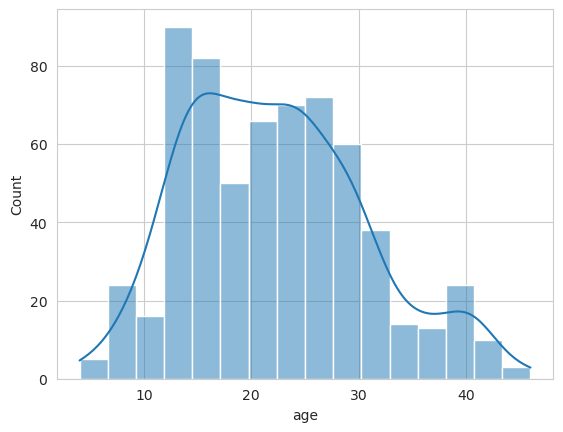

In [6]:
# Histogram of Age Profile
sns.histplot(df.age, kde=True)

Looks like an amalgamation of a few distributions, with onset of MH problems occurring in youth, late 20s and 40s.

In [7]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

encoder.fit(df[['Disorder']])
df['Disorder']= encoder.transform(df[['Disorder']])



In [8]:
from sklearn.model_selection import train_test_split
X= df.drop(columns=['Disorder'], axis=1)
y = df['Disorder']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size =.2, random_state=42)

In [10]:
X_train.shape

(509, 28)

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

In [13]:
from sklearn.model_selection import KFold, cross_val_score


In [14]:
y

0      3.0
1      1.0
2      2.0
3      8.0
4      7.0
      ... 
632    9.0
633    5.0
634    1.0
635    2.0
636    1.0
Name: Disorder, Length: 637, dtype: float64

In [15]:
y.values

array([ 3.,  1.,  2.,  8.,  7.,  6., 11., 10.,  1.,  9.,  0.,  1.,  1.,
        0.,  3.,  5.,  6.,  4.,  9.,  8., 11.,  6.,  4., 10.,  2.,  9.,
        5.,  6.,  9., 10.,  1.,  2.,  6.,  2.,  8., 11., 11.,  7.,  6.,
        3., 10., 10.,  9.,  8., 11.,  1.,  2.,  1.,  2.,  0.,  1.,  9.,
        8., 11.,  7.,  5.,  5.,  8.,  7.,  5., 10.,  1.,  9.,  0.,  1.,
        1.,  7.,  3.,  3.,  0.,  3.,  1.,  2.,  8.,  7.,  7.,  5.,  5.,
        9.,  7.,  3.,  3.,  6.,  4.,  0.,  3.,  1.,  2.,  8.,  7.,  6.,
       11., 10.,  1.,  9.,  0.,  1.,  1.,  7.,  3.,  3.,  6.,  4.,  9.,
        0.,  0.,  0.,  4.,  9.,  1.,  9.,  8., 11.,  6.,  4.,  9., 10.,
        1.,  2.,  6.,  2.,  8.,  2.,  8.,  7.,  6.,  1.,  7.,  3.,  0.,
        1.,  0.,  7.,  3.,  5.,  0.,  4.,  9., 11.,  7.,  5.,  5.,  1.,
        2.,  8.,  7.,  7.,  5.,  5.,  9.,  7.,  3.,  3., 11., 11.,  3.,
        0.,  1.,  1.,  7.,  3.,  5.,  6.,  4.,  9.,  0.,  5.,  5.,  9.,
        7.,  3.,  3.,  9.,  5.,  1.,  2.,  1.,  2.,  0.,  1.,  9

In [16]:
import pickle

In [17]:
from sklearn.model_selection import KFold, cross_val_score


In [18]:
def my_function(model):
    model.fit(X_train, y_train)
    test_data_prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, test_data_prediction)
  
  
    precision = precision_score(test_data_prediction, y_test, average='weighted')
    precision1 = precision_score(test_data_prediction, y_test, average='macro')
    precision2 = precision_score(test_data_prediction, y_test, average='micro')
    recall = recall_score(y_test, test_data_prediction, average='weighted')
    recall1 = recall_score(y_test, test_data_prediction, average='macro')
    recall2 = recall_score(y_test, test_data_prediction, average='micro')
    f1_score = 2 * (precision * recall) / (precision + recall)
    f1_score1 = 2 * (precision1 * recall1) / (precision1 + recall1)
    f1_score2 = 2 * (precision2 * recall2) / (precision2+ recall2)
    kf = KFold(n_splits=10, shuffle=True)



    # Evaluate model using cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=kf)
    print(scores)

    # Print average score
    print("Cross Validation Accuracy: %0.4f" % scores.mean())
    # fpr, tpr, thresholds = metrics.roc_curve(Y_test, test_data_prediction)
    # auc = metrics.auc(fpr, tpr)
    print('Accuracy score of the model', model , '=', round(accuracy,4))
    print('Weighted Precision score of the model', model , '=', round(precision,4))
    print('Macro Precision1 score of the model', model , '=', round(precision1,4))
    print('Micro Precision2 score of the model', model , '=', round(precision2,4))
    print('Weighted Recall score of the model', model , '=', round(recall,4))
    print('Macro Recall1 score of the model', model , '=', round(recall1,4))
    print('Micro Recall2 score of the model', model , '=', round(recall2,4))
    print('Weighted F1_score score of the model', model , '=', round(f1_score,4))
    print('Macro F1_score1 score of the model', model , '=', round(f1_score1,4))
    print('Micro F1_score2 score of the model', model , '=', round(f1_score2,4))
    # print('Cross validation accuracies for the', model, '=', cv_score, 'and', mean_accuracy)
    # print('AUC score for the', model, '=', round(auc,4))


    cr= classification_report(y_test, test_data_prediction) 

    print(cr)
    pickle.dump(model,open("lgbb_classifier.pkl","wb"))


In [19]:
my_function(lgb.LGBMClassifier())


[0.98039216 0.98039216 0.94117647 1.         1.         1.
 1.         0.96078431 1.         0.98      ]
Cross Validation Accuracy: 0.9843
Accuracy score of the model LGBMClassifier() = 1.0
Weighted Precision score of the model LGBMClassifier() = 1.0
Macro Precision1 score of the model LGBMClassifier() = 1.0
Micro Precision2 score of the model LGBMClassifier() = 1.0
Weighted Recall score of the model LGBMClassifier() = 1.0
Macro Recall1 score of the model LGBMClassifier() = 1.0
Micro Recall2 score of the model LGBMClassifier() = 1.0
Weighted F1_score score of the model LGBMClassifier() = 1.0
Macro F1_score1 score of the model LGBMClassifier() = 1.0
Micro F1_score2 score of the model LGBMClassifier() = 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        16
         2.0       1.00      1.00      1.00        11
         3.0       1.00      1.00      1.00        16
         4.0  